In [1]:
import pygor.filehandling
import pygor.load
import pygor.strf.analyse

# External
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import pathlib
import scipy
# Test
user = pathlib.Path(os.getcwd()).parents[-3].stem
user

sns.set_context('talk')
%reload_ext autoreload
%autoreload 2

c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


Found 6 custom classes in C:\Users\Simen\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage

Text(0, 0.5, 'Rel. absorbance')

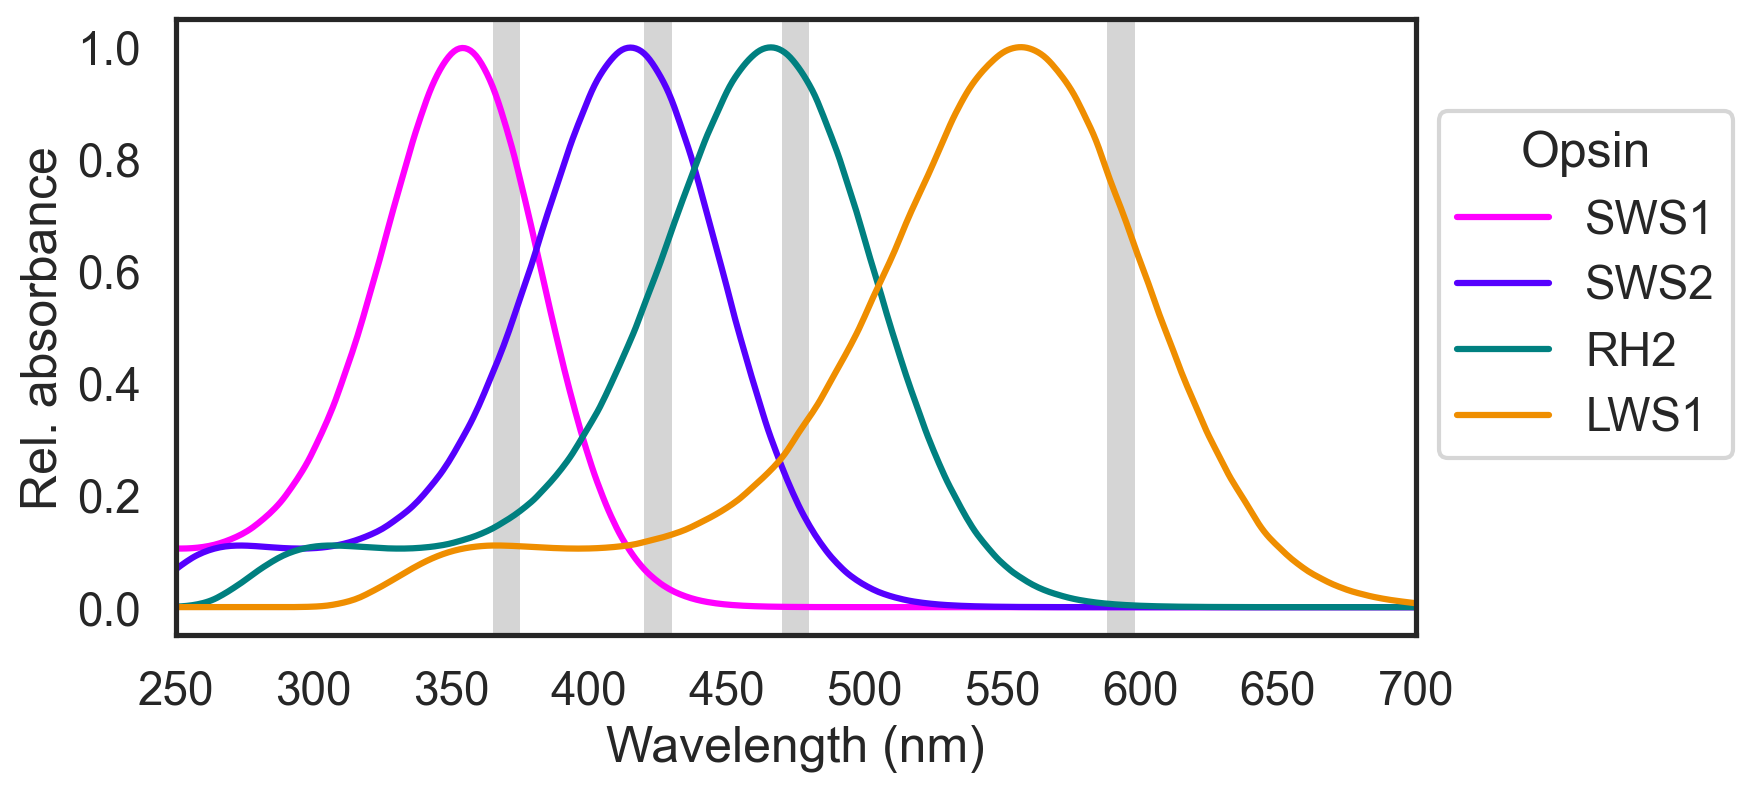

In [ ]:
zeb_ops = [355, 416, 467, 558]
led_wvs = [365, 420, 470, 588]
ops_nam = ["SWS1", "SWS2", "RH2", "LWS1"]
colours = pygor.plotting.fish_palette
reversed(colours)
fig, ax = plt.subplots(1, 1, figsize = (8, 4), dpi = 200)
for n, i in enumerate(zeb_ops):
    line = opsins[i]
    ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)   
    plt.plot(ysmoothed, c =colours[n], label = f"{ops_nam[n]}")
    plt.axvspan(led_wvs[n], led_wvs[n]+10, color = "grey", alpha = .33, lw = 0)
plt.xlim(250, 700)
plt.legend(title = "Opsin", bbox_to_anchor=(1, .25), loc=0)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Rel. absorbance")

# Analysis load

In [2]:
files = pygor.filehandling.find_files_in(".h5", r"..\src\pygor\examples", match = "demo", recursive=True) #"ColoursSWN"
files = files
files

[WindowsPath('../src/pygor/examples/strf_demo_data.h5')]

# Load pre-saved data

### Load from H5s

In [3]:
#files = pygor.filehandling.find_files_in(".h5", r"D:\Igor analyses\SWN", recursive=True, match = "SWN") #"ColoursSWN"
files = pygor.filehandling.find_files_in(".h5", fr"C:\Users\{user}\OneDrive\h5s", recursive=True, match = "SWN") #"ColoursSWN"
files = files
files

[WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-14_0_0_SWN_200_Colours.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_0_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_2_ColourSWN_200_1.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_4_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_MP_0_3_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-8_MP_0_0_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_0_ColourSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_1_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-6-14_'0_2_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_0_0_ColorSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_SMP_0_2_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-7-18_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-7-18_Colo

### Load from .pkls

In [3]:
files = pygor.filehandling.find_files_in(".pkl", r"C:\Users\Simen\OneDrive\Universitet\PhD\Pickles") #"ColoursSWN"
files

[WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-11-14_0_0_SWN_200_Colours.pkl'),
 WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-11-7_0_0_ColourSWN_200.pkl'),
 WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-11-7_MP_0_3_ColourSWN_200_.pkl'),
 WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-11-8_MP_0_0_ColourSWN_200_.pkl'),
 WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-6-13_0_0_ColourSWN_200_0.pkl'),
 WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-6-13_0_1_ColourSWN_200_0.pkl'),
 WindowsPath("C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-6-14_'0_2_ColourSWN_200_0'.pkl"),
 WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-6-14_0_0_ColorSWN_200_0.pkl'),
 WindowsPath('C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-6-14_SMP_0_2_ColourSWN_200_0.pkl'),
 WindowsPath("C:/Users/Simen/OneDrive/Universitet/PhD/Pickles/2023-7-18_'0_1_ColourSWN_200_0'.pkl"),


In [4]:
# Instantiate the object list 
list_of_objs = pygor.filehandling.load_list(files, as_class = pygor.load.STRF, bs_bool = False)
list_of_objs

Iterating through and loading listed files:   0%|          | 0/15 [00:00<?, ?it/s]

Output()

[14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours,
 07-11-2023:STRF:2023-11-7_0_0_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_MP_0_3_ColourSWN_200_,
 08-11-2023:STRF:2023-11-8_MP_0_0_ColourSWN_200_,
 13-06-2023:STRF:2023-6-13_0_0_ColourSWN_200_0,
 13-06-2023:STRF:2023-6-13_0_1_ColourSWN_200_0,
 14-06-2023:STRF:2023-6-14_'0_2_ColourSWN_200_0',
 14-06-2023:STRF:2023-6-14_0_0_ColorSWN_200_0,
 14-06-2023:STRF:2023-6-14_SMP_0_2_ColourSWN_200_0,
 18-07-2023:STRF:2023-7-18_'0_1_ColourSWN_200_0',
 18-07-2023:STRF:2023-7-18_ColourSWN_200_0_4,
 31-07-2023:STRF:2023-7-31_'0_1_ColourSWN_200_0',
 01-08-2023:STRF:2023-8-1_'0_0_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_1H']

In [5]:
exp = pygor.load.Experiment(list_of_objs)
# exp.detach_data([2,3])
exp.recording_id

id                               name        date  num_rois  type  \
0    0     2023-11-14_0_0_SWN_200_Colours  14-11-2023        11  STRF   
1    1        2023-11-7_0_0_ColourSWN_200  07-11-2023        70  STRF   
2    2    2023-11-7_MP_0_3_ColourSWN_200_  07-11-2023        52  STRF   
3    3    2023-11-8_MP_0_0_ColourSWN_200_  08-11-2023        31  STRF   
4    4      2023-6-13_0_0_ColourSWN_200_0  13-06-2023        59  STRF   
5    5      2023-6-13_0_1_ColourSWN_200_0  13-06-2023        19  STRF   
6    6    2023-6-14_'0_2_ColourSWN_200_0'  14-06-2023        31  STRF   
7    7       2023-6-14_0_0_ColorSWN_200_0  14-06-2023        62  STRF   
8    8  2023-6-14_SMP_0_2_ColourSWN_200_0  14-06-2023        31  STRF   
9    9    2023-7-18_'0_1_ColourSWN_200_0'  18-07-2023        13  STRF   
10  10        2023-7-18_ColourSWN_200_0_4  18-07-2023        20  STRF   
11  11    2023-7-31_'0_1_ColourSWN_200_0'  31-07-2023        22  STRF   
12  12     2023-8-1_'0_0_ColourSWN_200_0'  01-08-2023        26  STRF   
13  13     2023-8-2_'0_1_ColourSWN_200_0'  02-08-2023        13  STRF   
14  14    2023-8-2_'0_1_ColourSWN_200_1H'  02-08-2023         0  STRF   

                                                 path  
0   C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...  
1   C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...  
2   C:\Users\Simen\OneDrive\h5s\2023-11-7_MP_0_3_C...  
3   C:\Users\Simen\OneDrive\h5s\2023-11-8_MP_0_0_C...  
4   C:\Users\Simen\OneDrive\h5s\2023-6-13_0_0_Colo...  
5   C:\Users\Simen\OneDrive\h5s\2023-6-13_0_1_Colo...  
6   C:\Users\Simen\OneDrive\h5s\2023-6-14_'0_2_Col...  
7   C:\Users\Simen\OneDrive\h5s\2023-6-14_0_0_Colo...  
8   C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...  
9   C:\Users\Simen\OneDrive\h5s\2023-7-18_'0_1_Col...  
10  C:\Users\Simen\OneDrive\h5s\2023-7-18_ColourSW...  
11  C:\Users\Simen\OneDrive\h5s\2023-7-31_'0_1_Col...  
12  C:\Users\Simen\OneDrive\h5s\2023-8-1_'0_0_Colo...  
13  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  
14  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...

In [6]:
exp.recording[6].play_multichrom_strf(-1)

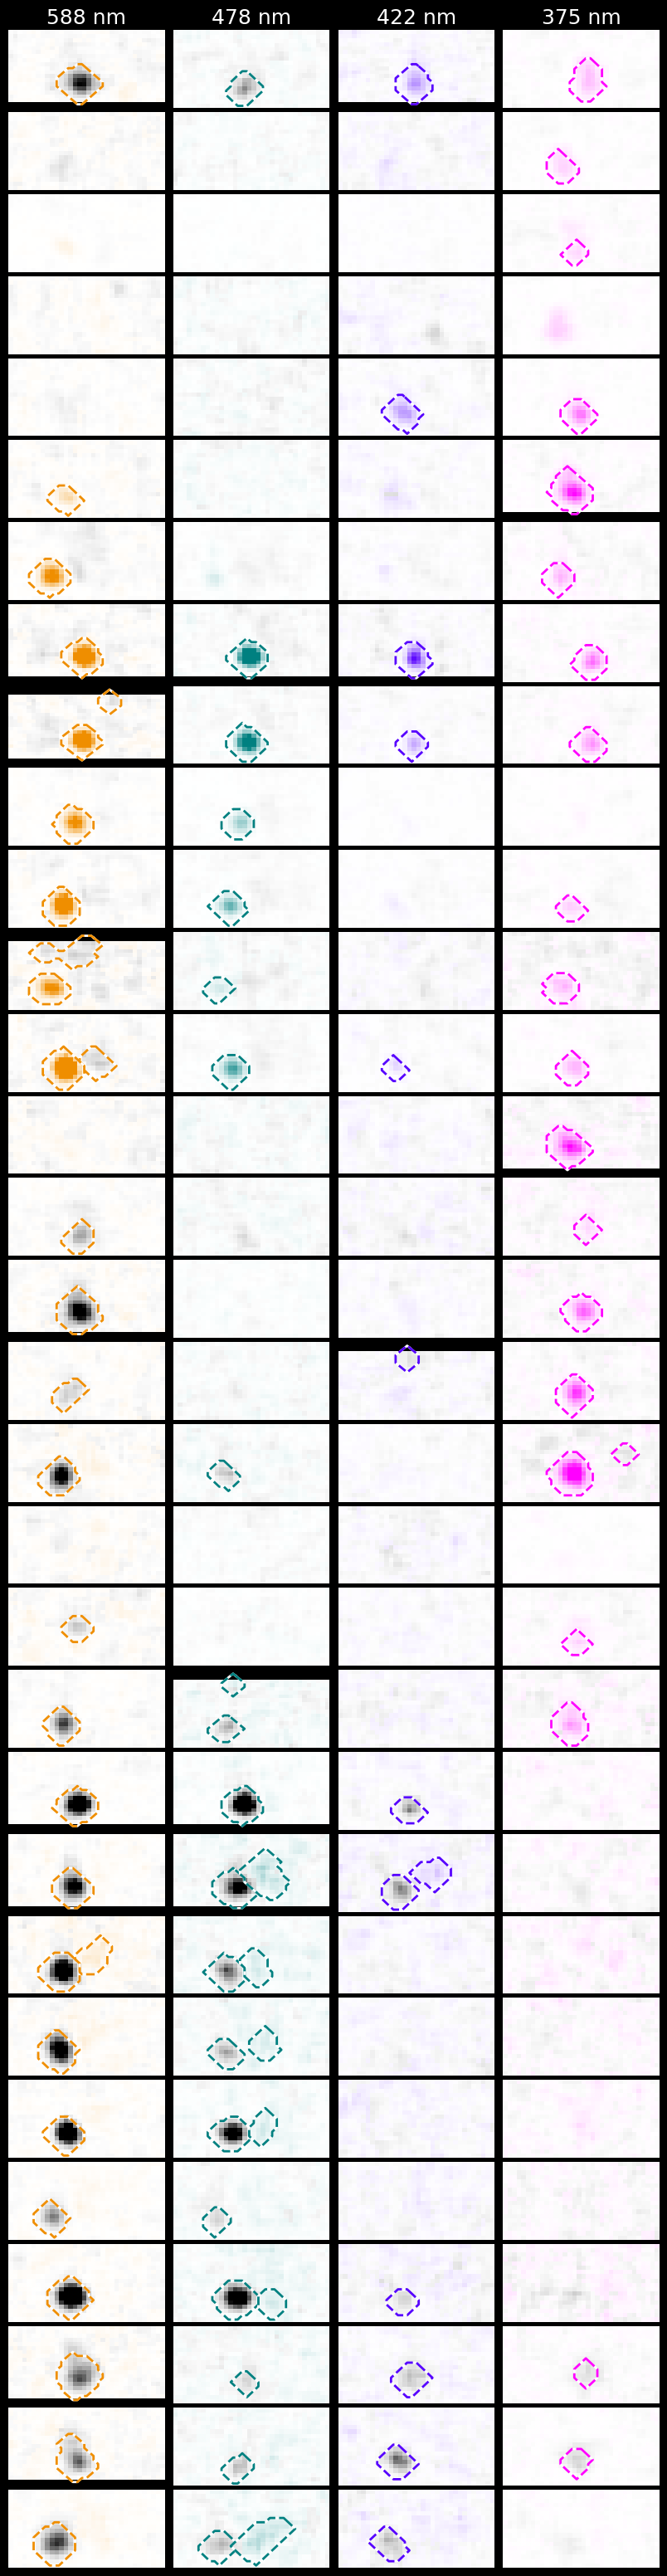

In [17]:
exp.recording[6].plot_chromatic_overview()

## Pickle and save them (if changes needed)

In [ ]:
for i in list_of_objs:
    i.save_pkl(r"C:\Users\Simen\OneDrive\Universitet\PhD\Pickles", i.name)

# Analysis by various groupings

In [ ]:
import pygor.strf.plot
import pygor.strf.analyse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")


In [ ]:
cs_df = pygor.strf.analyse.cs_df(exp)
cs_df["Areas"] = 2 * np.sqrt(cs_df["Areas"].to_numpy()/np.pi)
cs_df

Areas       C/S Colour  pol  Amplitude  ROI  \
0     22.891863    Centre      R   -1  -7.185487    0   
1      0.000000  Surround      R   -1   1.081363    0   
2     16.141897    Centre      R   -1  -4.101274    1   
3      0.000000  Surround      R   -1  -0.809979    1   
4      0.000000    Centre      R    0   0.000000    2   
...         ...       ...    ...  ...        ...  ...   
3211   0.000000  Surround     UV    0   0.000000   97   
3212   0.000000    Centre     UV    0   0.000000   98   
3213   0.000000  Surround     UV    0   0.000000   98   
3214   0.000000    Centre     UV    0   0.000000   99   
3215   0.000000  Surround     UV    0   0.000000   99   

                                               Filename  
0     C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...  
1     C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...  
2     C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...  
3     C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...  
4     C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...  
...                                                 ...  
3211  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  
3212  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  
3213  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  
3214  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  
3215  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  

[3216 rows x 7 columns]

In [ ]:
np.unique(cs_df["pol"])

array([-1,  0,  1,  2])

In [ ]:
cs_df.query("`C/S` == 'Surround' & pol == [-1, 1] & `Areas` < 1")

Areas       C/S Colour  pol  Amplitude  ROI  \
1       0.0  Surround      R   -1   1.081363    0   
3       0.0  Surround      R   -1   0.582782    1   
9       0.0  Surround      R   -1   0.809498    4   
17      0.0  Surround      R   -1   1.177727    8   
19      0.0  Surround      R   -1   0.247375    9   
...     ...       ...    ...  ...        ...  ...   
3833    0.0  Surround     UV    1  -0.615799   76   
3835    0.0  Surround     UV    1  -0.778353   77   
3837    0.0  Surround     UV    1  -1.095703   78   
3843    0.0  Surround     UV   -1   0.423304   81   
3845    0.0  Surround     UV   -1   0.957408   82   

                                               Filename  
1     C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
3     C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
9     C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
17    C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
19    C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
...                                                 ...  
3833  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3835  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3837  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3843  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3845  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  

[801 rows x 7 columns]

In [ ]:
cs_df.query("Amplitude < 0")

Areas       C/S Colour  pol  Amplitude  ROI  \
0     22.891863    Centre      R   -1  -7.185487    0   
2     16.141897    Centre      R   -1  -4.101274    1   
8     13.504629    Centre      R   -1  -3.947351    4   
16    15.883154    Centre      R   -1  -5.220082    8   
18    13.022835    Centre      R   -1  -4.887479    9   
...         ...       ...    ...  ...        ...  ...   
3833   0.000000  Surround     UV    1  -0.615799   76   
3835   0.000000  Surround     UV    1  -0.778353   77   
3837   0.000000  Surround     UV    1  -1.095703   78   
3842  14.793391    Centre     UV   -1  -5.051107   81   
3844  13.504629    Centre     UV   -1  -2.854350   82   

                                               Filename  
0     C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
2     C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
8     C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
16    C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
18    C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...  
...                                                 ...  
3833  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3835  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3837  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3842  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  
3844  C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...  

[819 rows x 7 columns]

In [ ]:
abs_cs_df = cs_df
abs_cs_df["Amplitude"] = np.abs(cs_df["Amplitude"])

In [ ]:
for i in cs_df.keys():
    print(i, len(cs_df[i]))

Areas 3880
C/S 3880
Colour 3880
pol 3880
Amplitude 3880
ROI 3880
Filename 3880


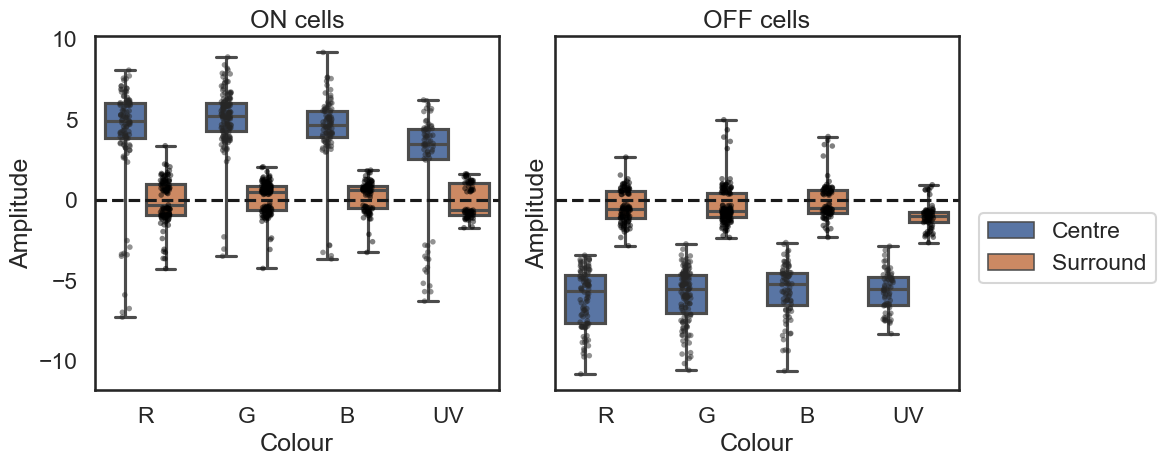

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12, 5), sharey=True)
# SNS
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude",  whis=10, hue = "C/S", ax = ax[0])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", whis=10, hue = "C/S", ax = ax[1])
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[0], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[1],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)
ax.flat[0].axhline(0, ls = "--", c = "k")
ax.flat[1].axhline(0, ls = "--", c = "k")
plt.tight_layout()
ax[0].set_title("ON cells")
ax[1].set_title("OFF cells")
# plt.suptitle("Relative C/S contribution, Amplitude > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

In [ ]:
import pygor.strf.clustering.run_clustering

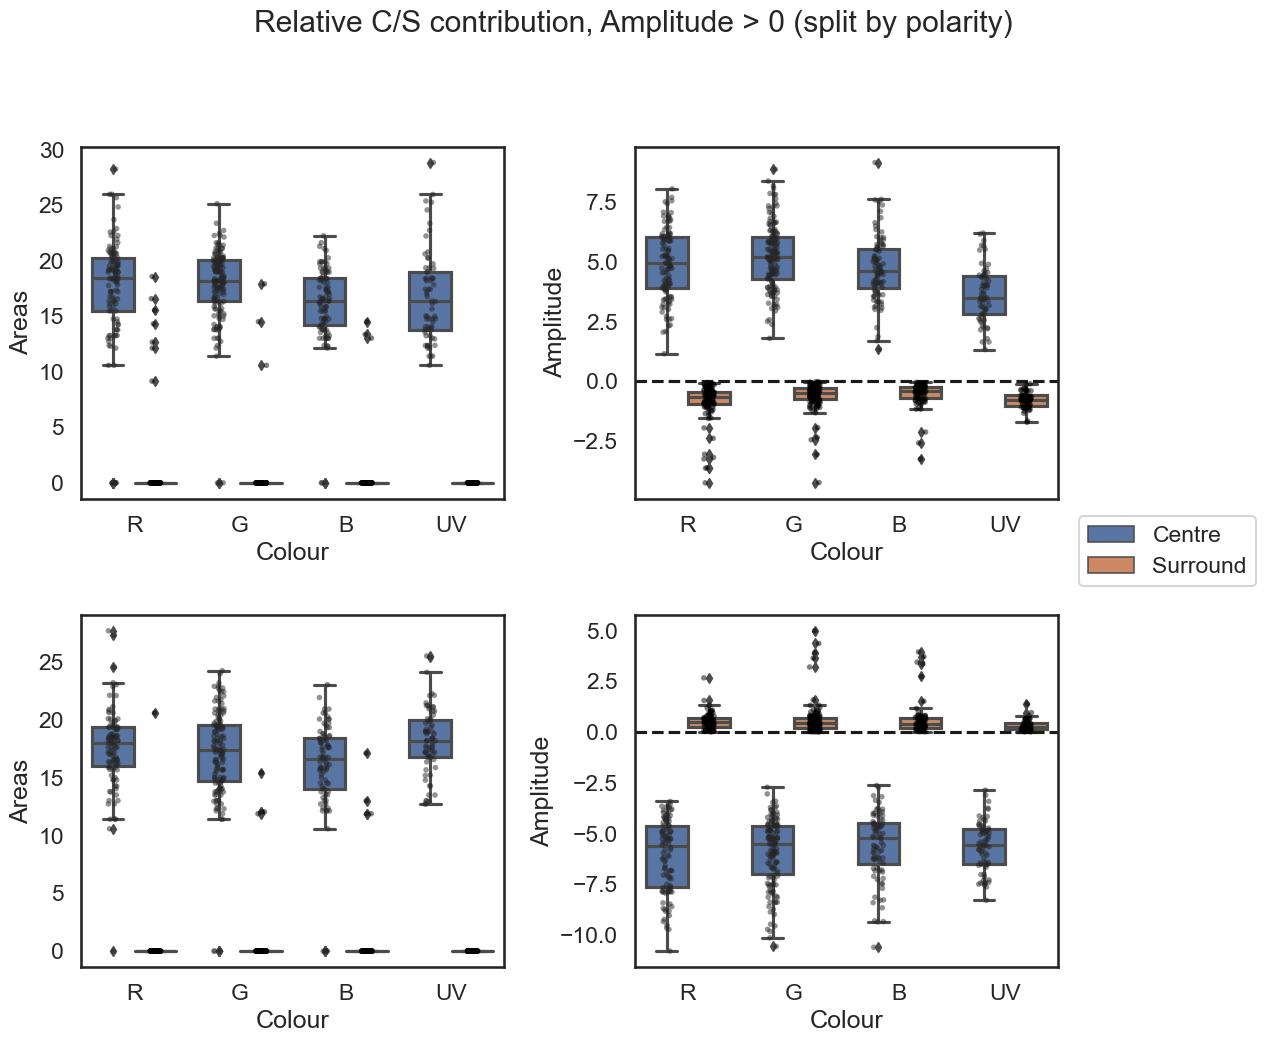

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
# SNS
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[0])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[1])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[2])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[3])
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[0],     palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[1], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[2],    palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[3],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, -.05), loc=2, borderaxespad=0.)
ax.flat[2].get_legend().remove()
ax.flat[3].get_legend().remove()
ax.flat[1].axhline(0, ls = "--", c = "k")
ax.flat[3].axhline(0, ls = "--", c = "k")
plt.tight_layout()
plt.suptitle("Relative C/S contribution, Amplitude > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

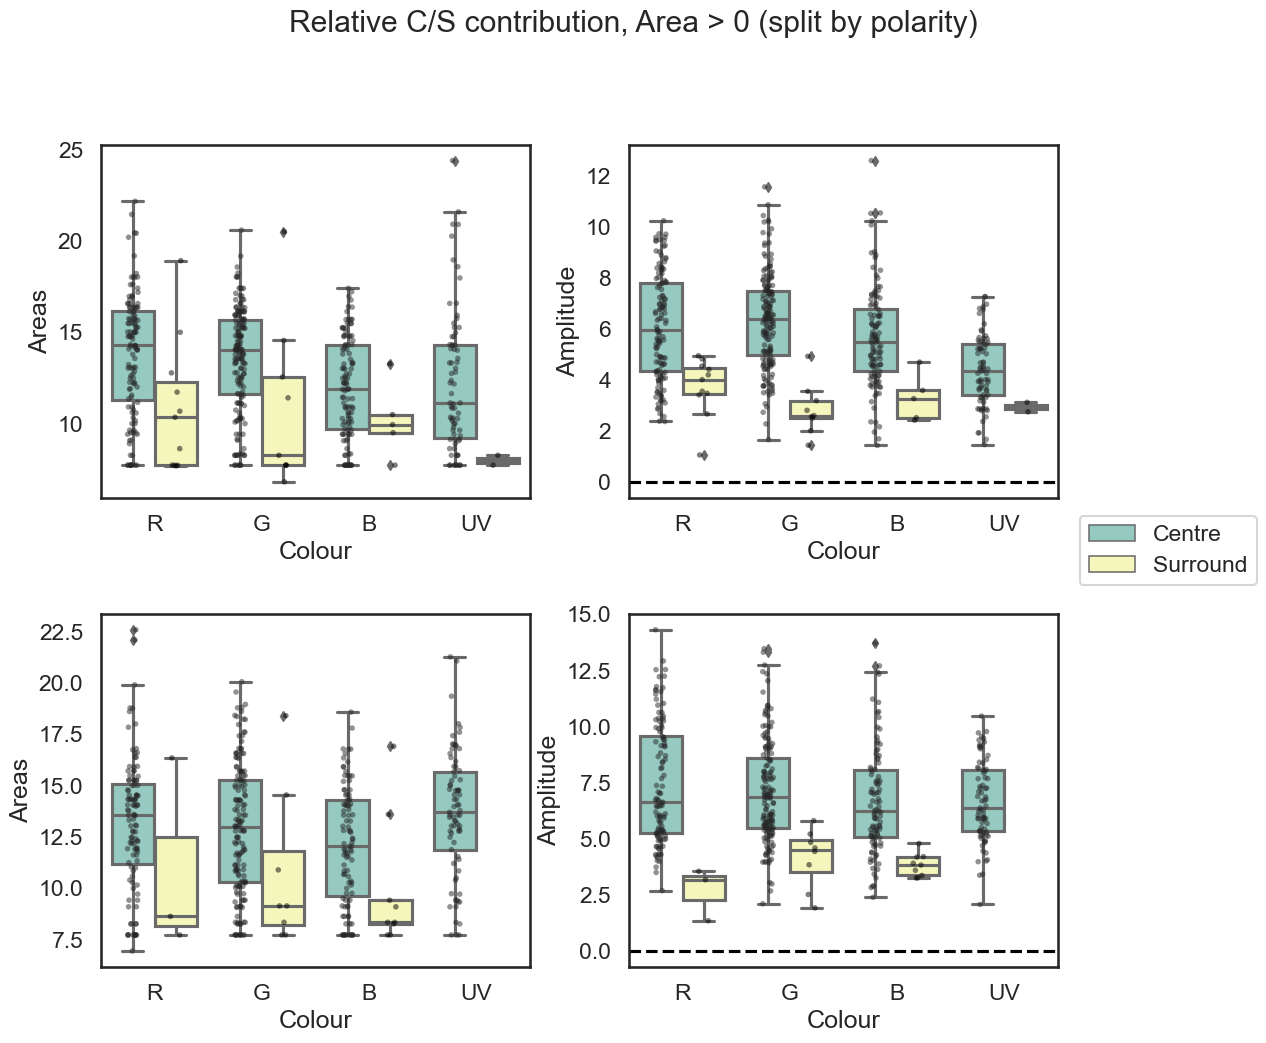

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
# SNS
sns.boxplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[0])
sns.boxplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[1])
sns.boxplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[2])
sns.boxplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[3])
sns.stripplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[0],     palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[1], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[2],    palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[3],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, -.05), loc=2, borderaxespad=0.)
ax.flat[2].get_legend().remove()
ax.flat[3].get_legend().remove()
ax.flat[1].axhline(0, ls = "--", c = "k")
ax.flat[3].axhline(0, ls = "--", c = "k")
plt.tight_layout()
plt.suptitle("Relative C/S contribution, Area > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

<AxesSubplot: xlabel='C/S', ylabel='Amplitude'>

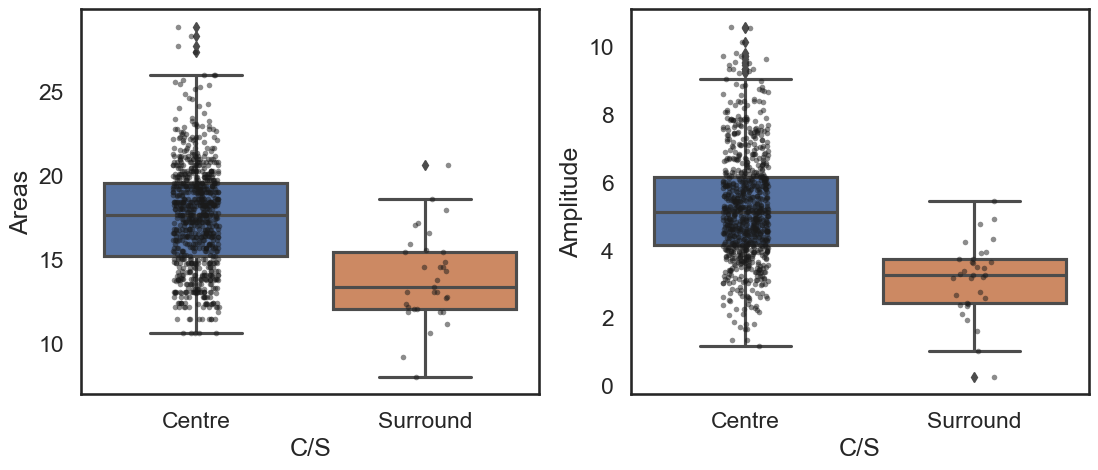

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))
sns.boxplot(abs_cs_df.query(  "Areas > 0"), y = "Areas", x = "C/S", ax=ax[0])
sns.boxplot(abs_cs_df.query(  "Areas > 0"), y = "Amplitude", x = "C/S", ax=ax[1])
sns.stripplot(abs_cs_df.query("Areas > 0"),  y = "Areas", x = "C/S", color = "k", size = 4,alpha = .5, ax=ax[0])
sns.stripplot(abs_cs_df.query("Areas > 0"),  y = "Amplitude", x = "C/S", color = "k", size = 4,alpha = .5, ax=ax[1])

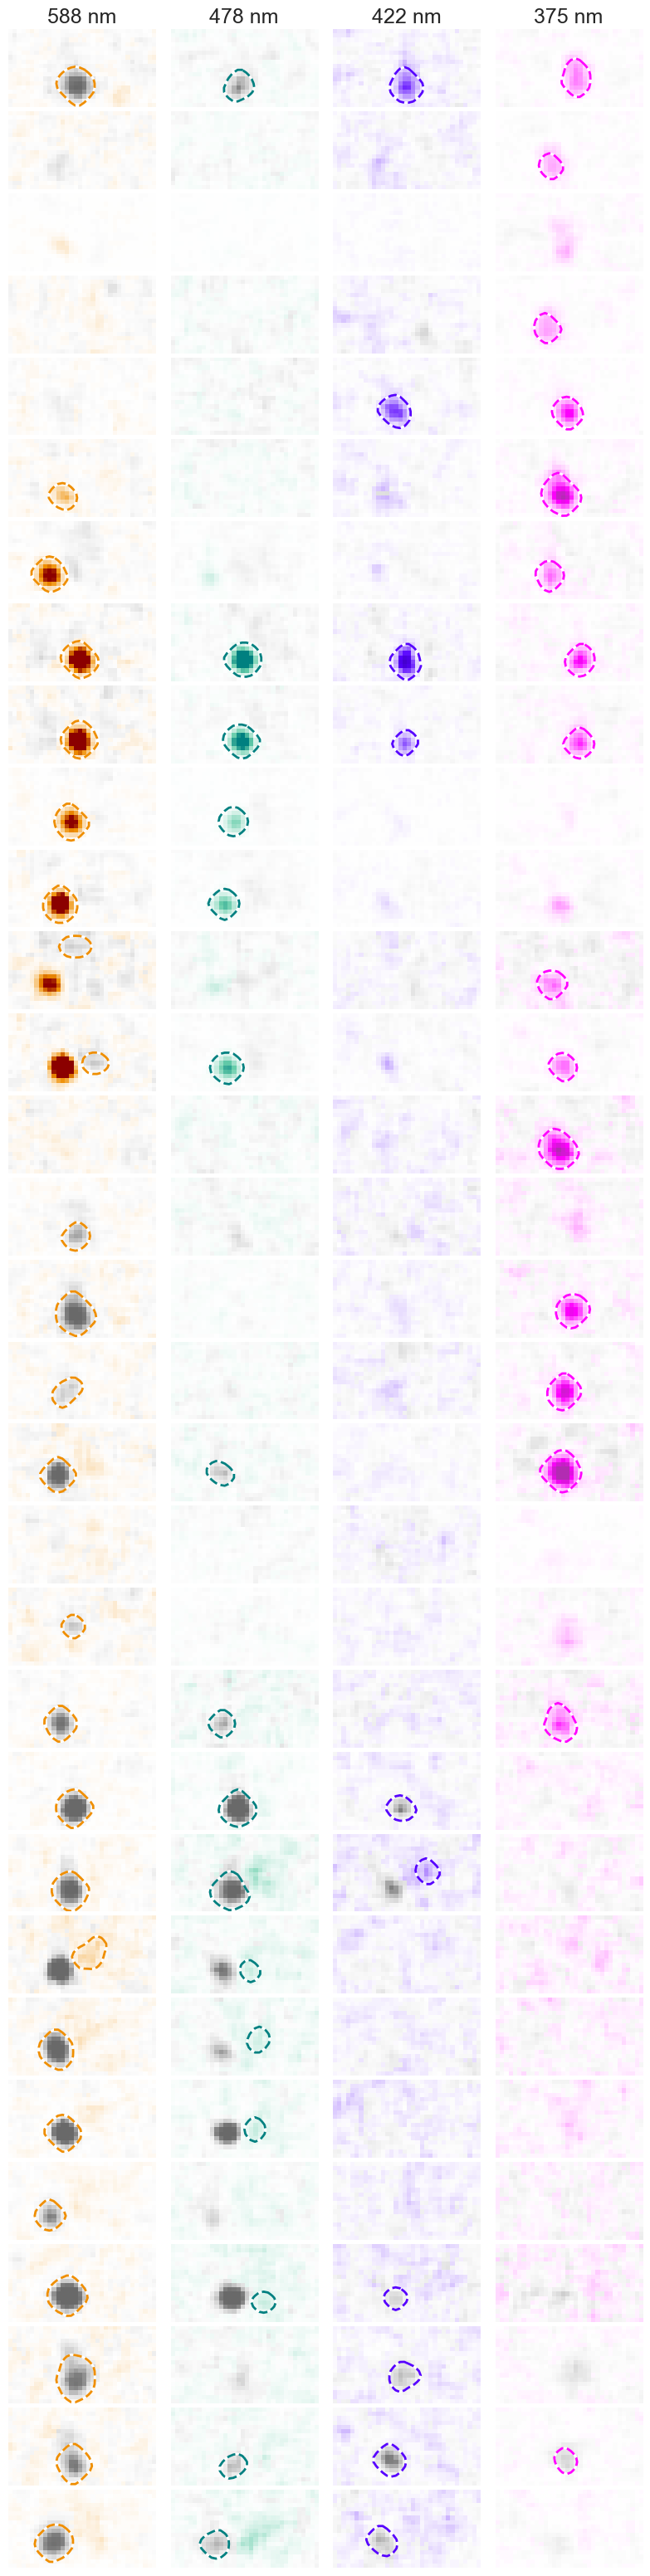

In [ ]:
list_of_objs[6].plot_chromatic_overview()

Text(0.5, 1.05, 'Relative C/S contribution in dual-polarity cells')

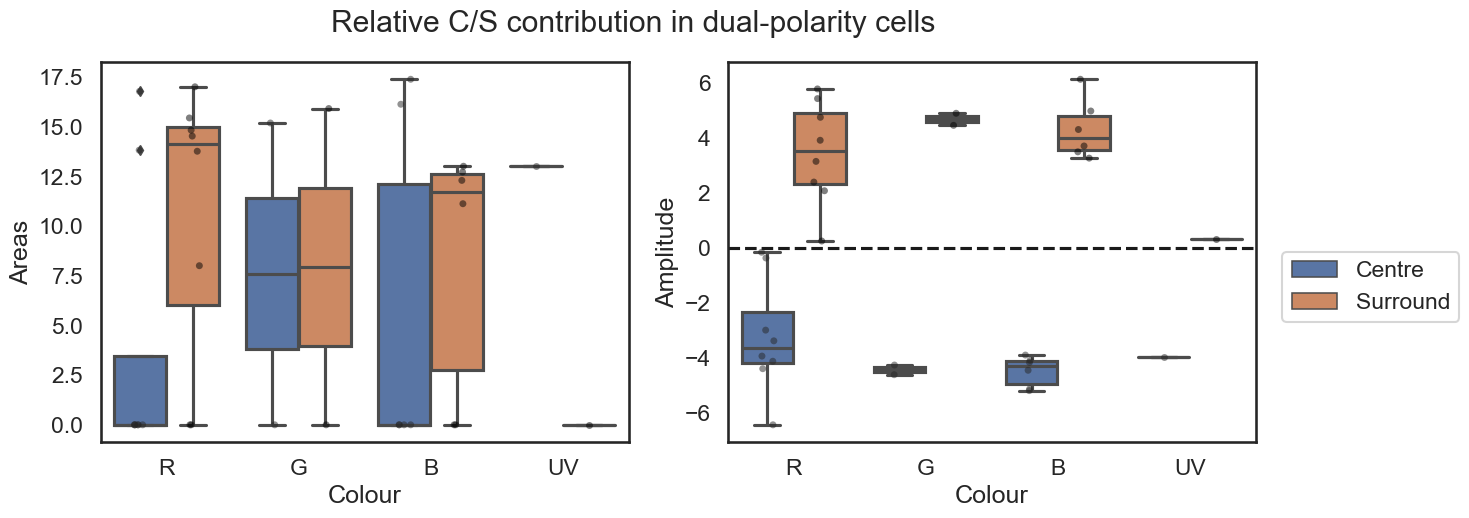

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))
sns.boxplot(cs_df.query(  "pol == 2"), x = "Colour", y = "Areas", hue = "C/S", whis = 2, ax = ax[0])
sns.boxplot(cs_df.query(  "pol == 2"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax[1])
sns.stripplot(cs_df.query("pol == 2"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax[0],     palette="dark:black", size = 5, alpha = .5)
sns.stripplot(cs_df.query("pol == 2"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[1], palette="dark:black", size = 5, alpha = .5)
ax[0].get_legend().remove()
ax[1].axhline(0, ls = "--", c = "k")
plt.tight_layout()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2],bbox_to_anchor=(1.05, .5), loc=2, borderaxespad=0.)
plt.suptitle("Relative C/S contribution in dual-polarity cells", y = 1.05)
# plt.legend(title = "C/S")

In [ ]:
opsins = np.load(r"C:\Users\Simen\Downloads\AllOpsins.npy")

## Plot population stats roy-by-roi

In [56]:
roi_df = pygor.strf.analyse.roi_stats(exp)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor

In [ ]:
roi_df.query("contour_area_total > 0")

date                                               path  \
0     2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
1     2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
4     2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
7     2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
8     2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
...          ...                                                ...   
1916  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
1917  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
1918  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
1921  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
1922  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   

                                filename  roi  ipl_depths  multicolour colour  \
0      2023-11-14_0_0_SWN_200_Colours.h5    0         NaN         True      R   
1      2023-11-14_0_0_SWN_200_Colours.h5    0         NaN         True      G   
4      2023-11-14_0_0_SWN_200_Colours.h5    1         NaN         True      R   
7      2023-11-14_0_0_SWN_200_Colours.h5    1         NaN         True     UV   
8      2023-11-14_0_0_SWN_200_Colours.h5    2         NaN         True      R   
...                                  ...  ...         ...          ...    ...   
1916  2023-8-2_'0_1_ColourSWN_200_1H'.h5   19        76.0         True      R   
1917  2023-8-2_'0_1_ColourSWN_200_1H'.h5   19        30.0         True      G   
1918  2023-8-2_'0_1_ColourSWN_200_1H'.h5   19        33.0         True      B   
1921  2023-8-2_'0_1_ColourSWN_200_1H'.h5   20        93.0         True      G   
1922  2023-8-2_'0_1_ColourSWN_200_1H'.h5   20        78.0         True      B   

     simultaneous  combo  size  ...  dom_biphasic_index  pols_corr    neg_auc  \
0               n    NaN   200  ...           -0.359201  -0.100752 -17.139338   
1               n    NaN   200  ...           -0.380754   0.042105 -10.829629   
4               n    NaN   200  ...           -0.928148  -0.436090 -33.162453   
7               n    NaN   200  ...            0.156635   0.526316   0.162812   
8               n    NaN   200  ...           -0.905392  -0.500752 -37.177267   
...           ...    ...   ...  ...                 ...        ...        ...   
1916            n    NaN   200  ...            0.416457   0.676692  -5.299362   
1917            n    NaN   200  ...            0.022875   0.831579  -2.519778   
1918            n    NaN   200  ...            0.407295   0.708271  -2.396810   
1921            n    NaN   200  ...           -0.937195   0.909774 -33.841774   
1922            n    NaN   200  ...           -0.381103   0.569925 -10.514045   

        pos_auc  neg_peaktime  pos_peaktime dom_peaktime  neg_centroids  \
0      6.086507            17            14           17       1.412217   
1      3.090279            16            11           16       1.277630   
4      5.193668            16            12           16       0.879593   
7      4.053417             8            17           17       3.193250   
8      6.066096            15             8           15       0.891282   
...         ...           ...           ...          ...            ...   
1916  11.015269            11            17           17       0.570698   
1917   0.657939             3            16           16       1.474329   
1918  10.912470             8            15           15       1.408428   
1921  -2.768600            15             2           15       0.915597   
1922   3.440596            15            11           15       1.428262   

      pos_centroids  dom_centroids  
0          1.053281       1.412217  
1          1.910247       1.277630  
4          0.818308       0.879593  
7          2.091699       2.091699  
8          0.914600       0.891282  
...             ...            ...  
1916       1.712345       1.712345  
1917       1.938

In [ ]:
roi_df.columns

Index(['date', 'path', 'filename', 'roi', 'ipl_depths', 'multicolour',
       'colour', 'simultaneous', 'combo', 'size', 'shapeZ', 'shapeY', 'shapeX',
       'XYratio', 'visang_size', 'frequency', 'noise', 'time_pval',
       'space_pval', 'neg_contour_bool', 'pos_contour_bool',
       'neg_contour_count', 'pos_contour_count', 'total_contour_count',
       'neg_contour_area_total', 'pos_contour_area_total',
       'contour_area_total', 'contour_complexity', 'neg_extrema',
       'pos_extrema', 'polarity', 'neg_biphasic_index', 'pos_biphasic_index',
       'dom_biphasic_index', 'pols_corr', 'neg_auc', 'pos_auc', 'neg_peaktime',
       'pos_peaktime', 'dom_peaktime', 'neg_centroids', 'pos_centroids',
       'dom_centroids'],
      dtype='object')

<AxesSubplot: xlabel='contour_complexity', ylabel='contour_area_total'>

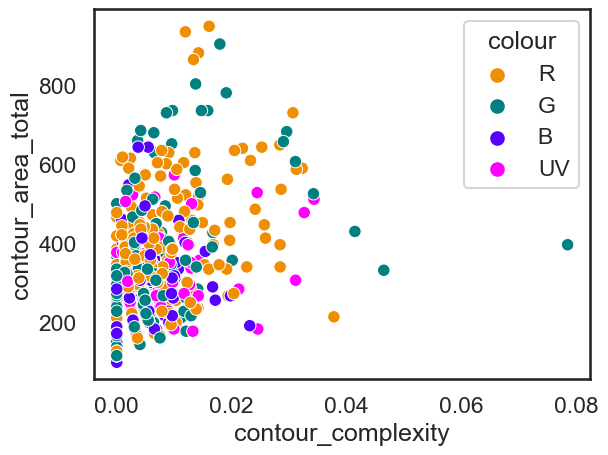

In [60]:
sns.scatterplot(data = roi_df, x = "contour_complexity", y = "contour_area_total", hue = "colour", palette=pygor.plotting.custom.fish_palette)

### Assess how well contouring has worked
If the majority have 0 or 1 contour, we are good to go

<AxesSubplot: xlabel='total_contour_count', ylabel='Count'>

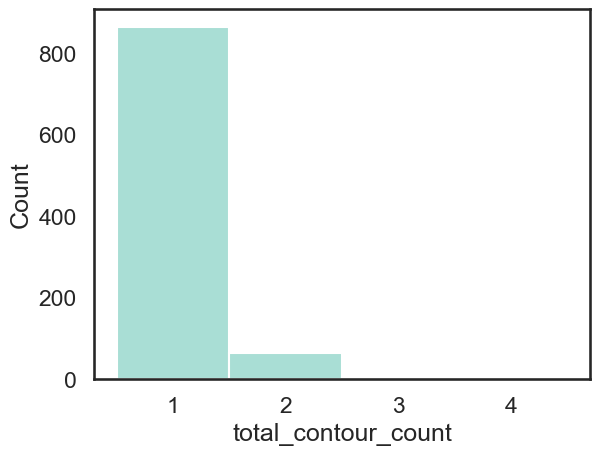

In [ ]:
sns.histplot(roi_df.query("contour_area_total > 0"), x = "total_contour_count", discrete=True)

In [ ]:
neg = roi_df["neg_contour_area_largest"].to_numpy()
pos = roi_df["pos_contour_area_largest"].to_numpy()

<AxesSubplot: xlabel='total_contour_area_largest', ylabel='dom_centroids'>

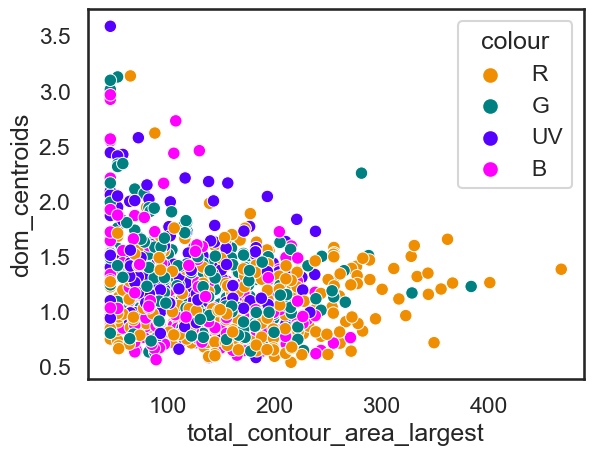

In [ ]:
sns.scatterplot(data = roi_df.query("total_contour_area_largest > 0"), x = "total_contour_area_largest", y = "dom_centroids", hue = "colour", palette=pygor.plotting.custom.fish_palette)

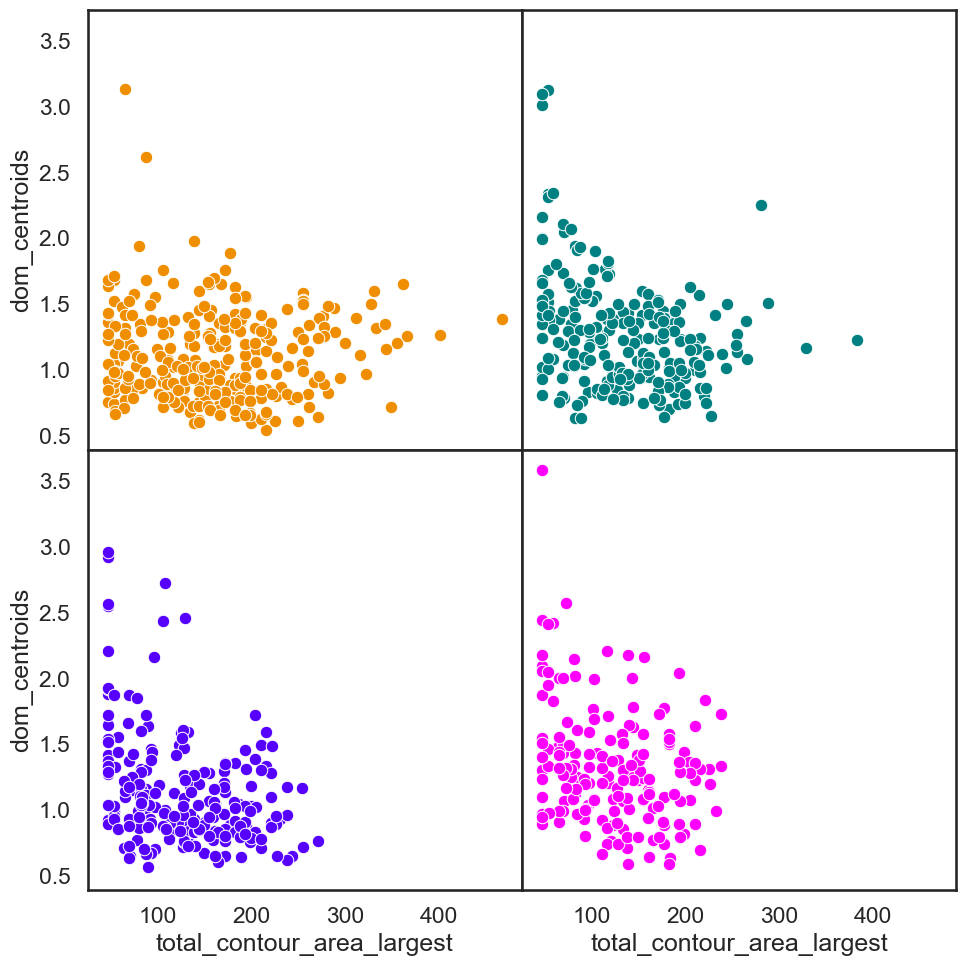

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.scatterplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0])
sns.scatterplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1])
sns.scatterplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2])
sns.scatterplot(data = non_zeros.query("colour == 'UV'"), x = "total_contour_area_largest", y = "dom_centroids", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3])
plt.tight_layout()


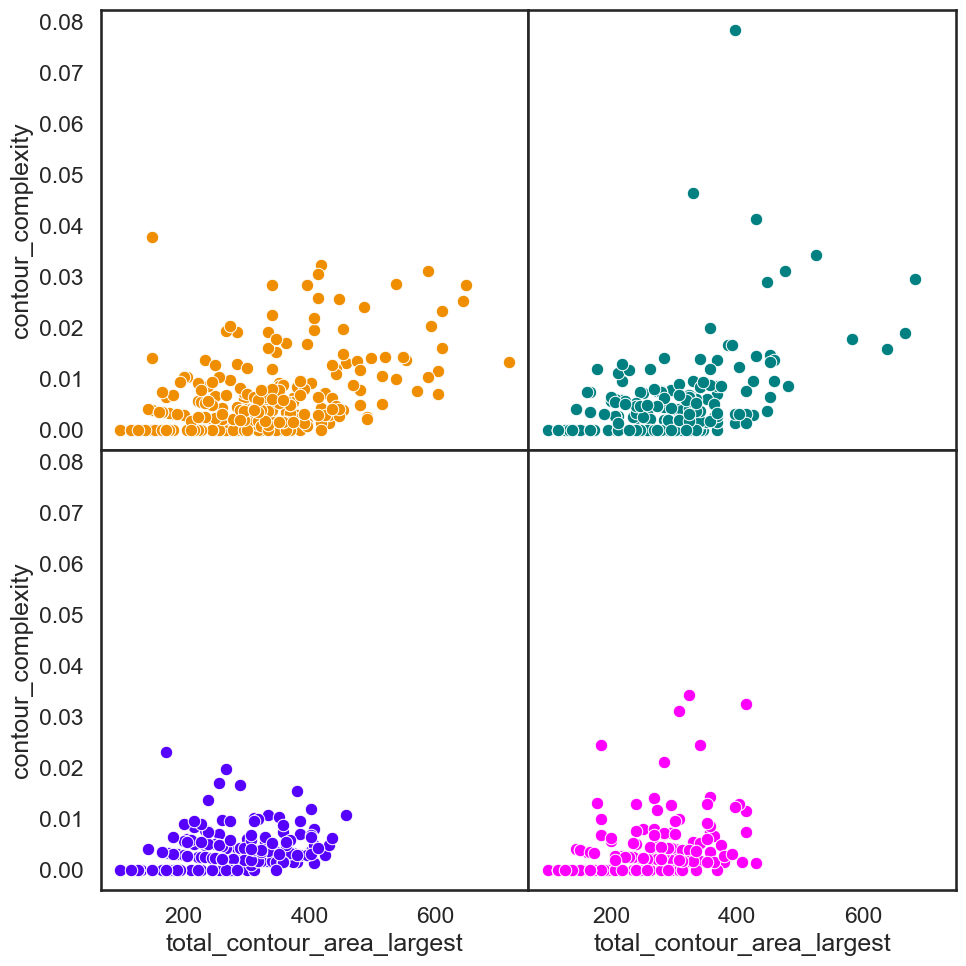

In [61]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.scatterplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest",  y = "contour_complexity", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0])
sns.scatterplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest",  y = "contour_complexity", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1])
sns.scatterplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest",  y = "contour_complexity", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2])
sns.scatterplot(data = non_zeros.query("colour == 'UV'"), x = "total_contour_area_largest", y = "contour_complexity", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3])
plt.tight_layout()


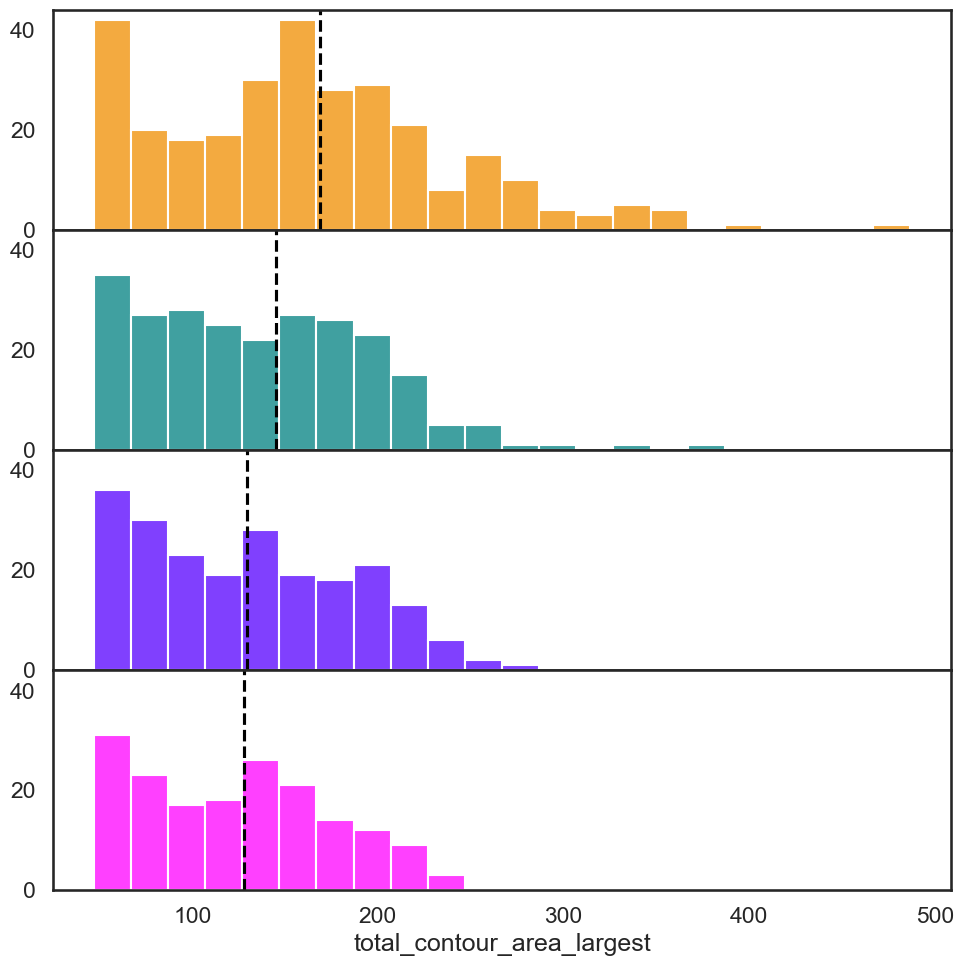

In [ ]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars", binwidth=20)
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.average(non_zeros.query(f"colour == '{c}'")["contour_area_total"]), c = "k", ls = "--")
plt.tight_layout()


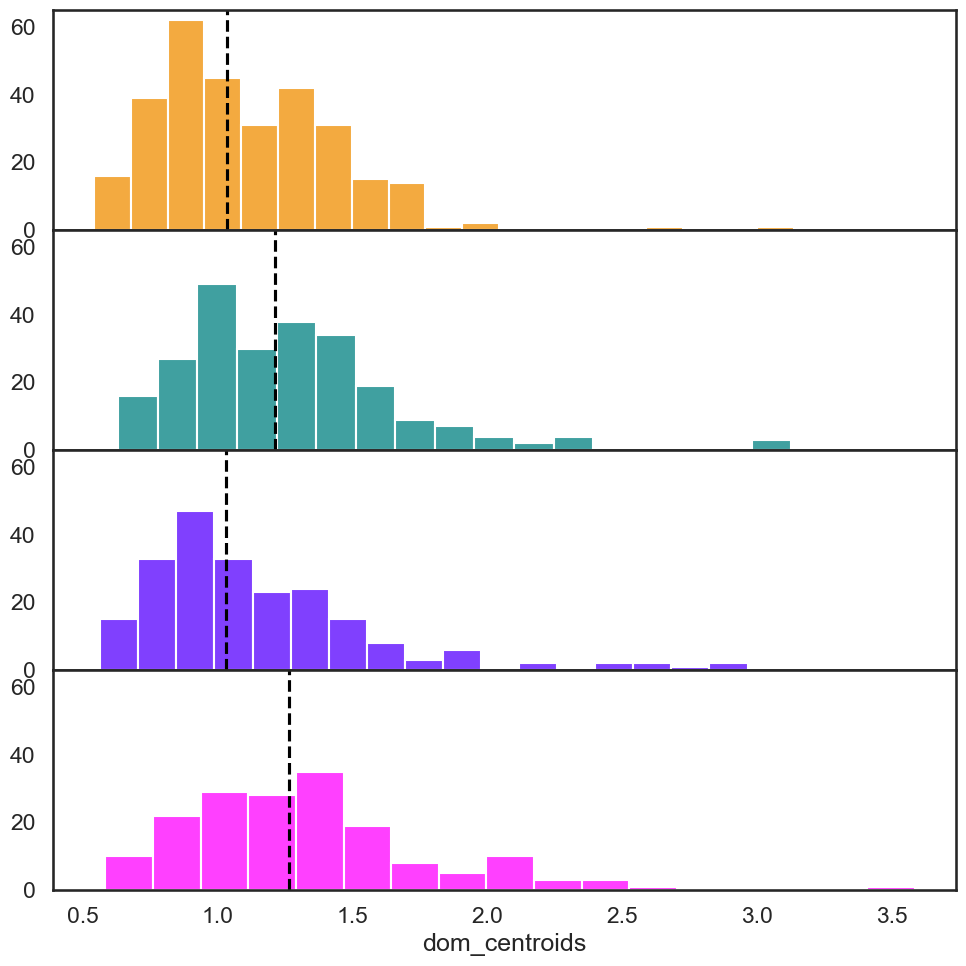

In [ ]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
stat = "dom_centroids"
non_zeros = roi_df.query(f"{stat} > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars")
sns.histplot(data = non_zeros.query("colour == 'G'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars")
sns.histplot(data = non_zeros.query("colour == 'B'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars")
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = f"{stat}", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars")
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.median(non_zeros.query(f"colour == '{c}'")[f"{stat}"]), c = "k", ls = "--")
plt.tight_layout()


 Next thing to do is to plot centre-surround tunings, preferably from clusters
 1. Get clustering working 
 2. Get a CS param from each strf_obj
 3. Get a DF param accordingly, where hue = cs_bool/CS-loading 


In [ ]:
roi_df.filter(items = ["contour_area_total", "colour"]).groupby("colour").describe().reindex(['R', 'G', 'B', 'UV'])

contour_area_total                                                      \
                    count        mean         std  min  25%      50%      75%   
colour                                                                          
R                   485.0  159.752089  166.527485  0.0  0.0  143.676  250.096   
G                   485.0  115.184019  148.808341  0.0  0.0    0.000  198.908   
B                   485.0   92.912903  124.020294  0.0  0.0    0.000  172.890   
UV                  485.0   69.439860  112.254040  0.0  0.0    0.000  133.464   

                 
            max  
colour           
R       969.876  
G       819.898  
B       633.930  
UV      643.612

In [ ]:
stat = "dom_centroids"
Rs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'R' & contour_area_total > 0")
Gs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'G' & contour_area_total > 0")
Bs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'B' & contour_area_total > 0")
Uvs = roi_df.filter(items =[f"{stat}", "contour_area_total", "colour"]).query("colour == 'UV' & contour_area_total > 0")
F, p = scipy.stats.f_oneway(Rs[f"{stat}"], Gs[f"{stat}"], Bs[f"{stat}"], Uvs[f"{stat}"])
print('%.08f' % p)

0.00000000


## Plot population stats by chromaticity

In [239]:
chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  comple

date                                               path  \
0    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
1    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
2    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
3    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
4    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
..          ...                                                ...   
480  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
481  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
482  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
483  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
484  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   

                               filename  \
0     2023-11-14_0_0_SWN_200_Colours.h5   
1     2023-11-14_0_0_SWN_200_Colours.h5   
2     2023-11-14_0_0_SWN_200_Colours.h5   
3     2023-11-14_0_0_SWN_200_Colours.h5   
4     2023-11-14_0_0_SWN_200_Colours.h5   
..                                  ...   
480  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
481  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
482  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
483  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
484  2023-8-2_'0_1_ColourSWN_200_1H'.h5   

                                             curr_path strf_keys  \
0    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_0   
1    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_1   
2    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_2   
3    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_3   
4    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_4   
..                                                 ...       ...   
480  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_20   
481  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_21   
482  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_22   
483  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_23   
484  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_24   

                                               cell_id  size  ipl_depths  \
0     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_0   200        95.0   
1     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_1   200        81.0   
2     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_2   200        81.0   
3     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_3   200        75.0   
4     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_4   200        43.0   
..                                                 ...   ...         ...   
480  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        83.0   
481  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        61.0   
482  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        84.0   
483  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        34.0   
484  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        87.0   

     opp_bool  ampl_375  ...  peakpos_588  pol_375  pol_422  pol_478  pol_588  \
0        True -0.311245  ...        0.650        0        0       -1       -1   
1        True  0.199129  ...        0.585        0        0        0       -1   
2        True -0.423248  ...        0.520        0        0       -1       -1   
3        True  0.417496  ...        0.130        0        0        0       -1   
4       False  4.685262  ...        1.040        1        1        1        1   
..        ...       ...  ...          ...      ...      ...      ...      ...   
480      True  0.250045  ...        0.390        0       -1       -1        0   
481     False -0.284578  ...        1.235        0        0        0        0   
482     False  0.296887  ...        0.325        0        0        0        0   
483     False -0.398743  ...        0.650        0        0        0        0   
484     False  0.427444  ...    

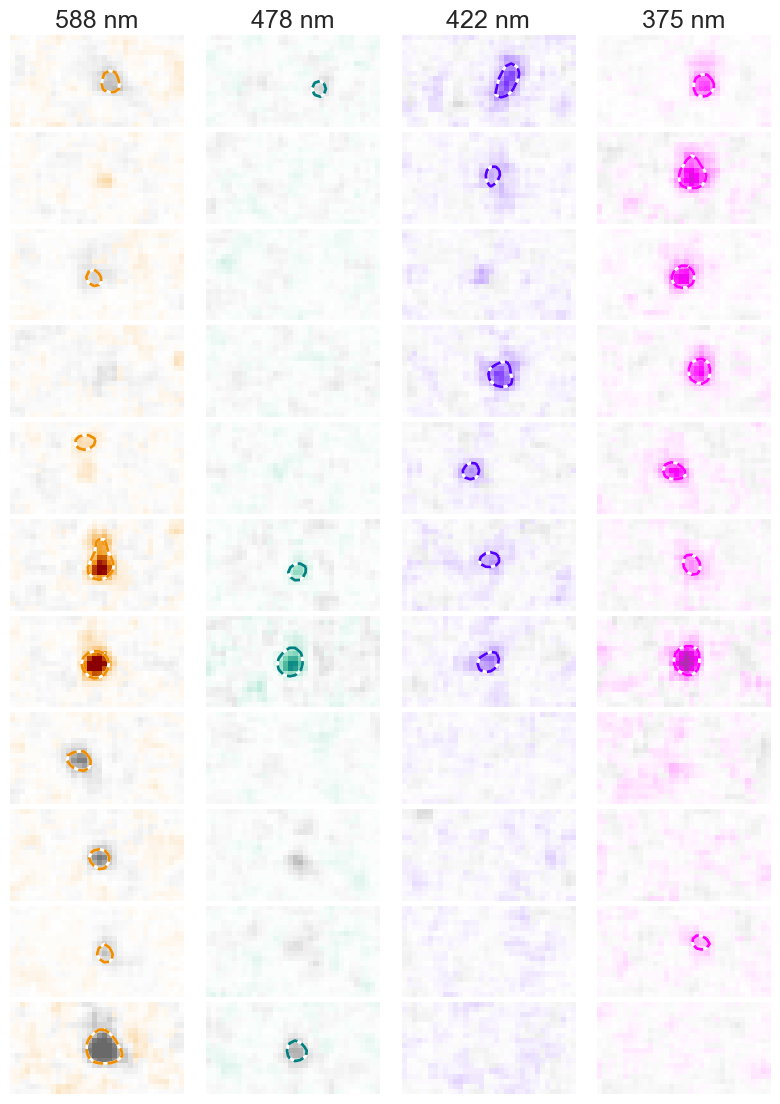

In [ ]:
list_of_objs[0].plot_chromatic_overview()

In [ ]:
list_of_objs[0].run_bootstrap('y')

Hang on, bootstrapping pygor.strf.temporal components 2500 times:   0%|          | 0/44 [00:00<?, ?it/s]

Hang on, bootstrapping spatial components 1000 times:   0%|          | 0/44 [00:00<?, ?it/s]

14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours

In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

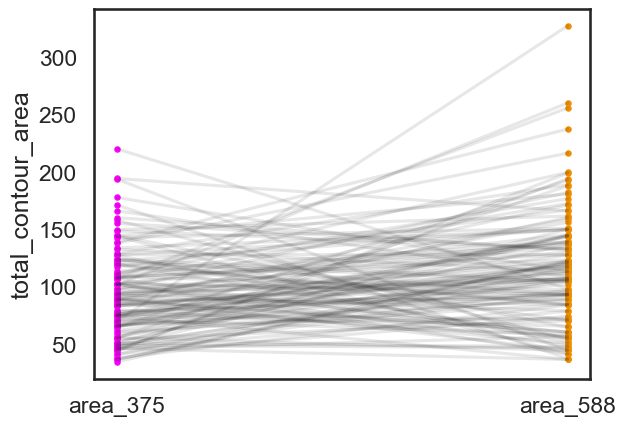

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

(0.0, 400.0)

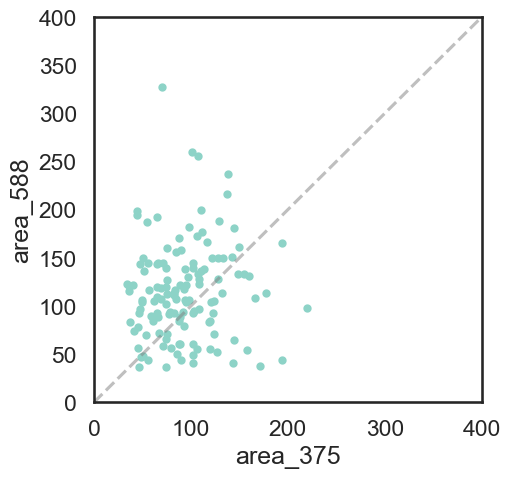

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 400)
plt.ylim(0, 400)


In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

Found 6 custom classes in C:\Users\Simen\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


[autoreload of pygor.strf.analyse failed: Traceback (most recent call last):
  File "c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\IPython\extensions\autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\IPython\extensions\autoreload.py", line 459, in superreload
    module = reload(module)
  File "c:\Users\Simen\miniconda3\envs\strfclone\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py", line 322, in <module>
    def chromatic_stats(exp_obj : pygor.classes.experiment.Experiment) -> pd.DataFrame:
AttributeError: module 'pygor' has no attribute 'classes'
]


(10.0, 210.0)

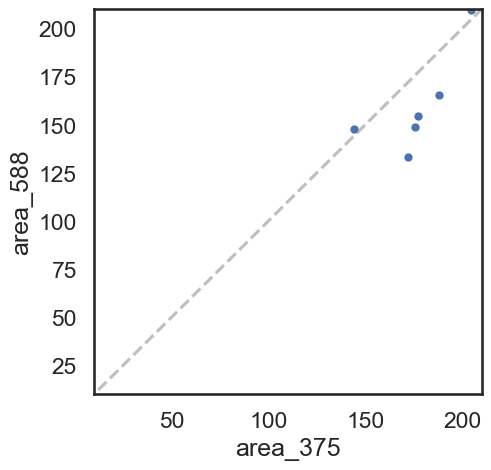

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(chroma_df["area_375"], chroma_df["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(10, 210)
plt.ylim(10, 210)


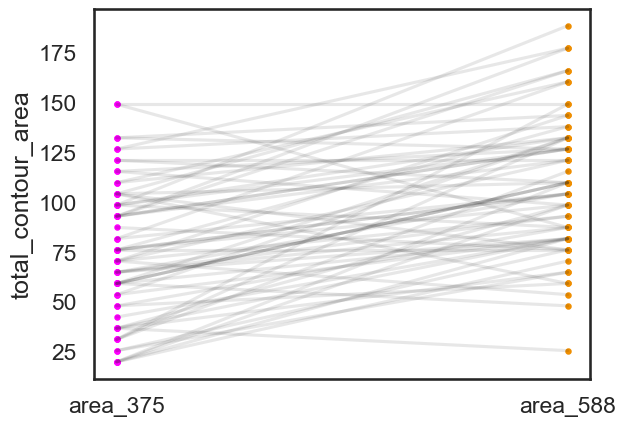

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

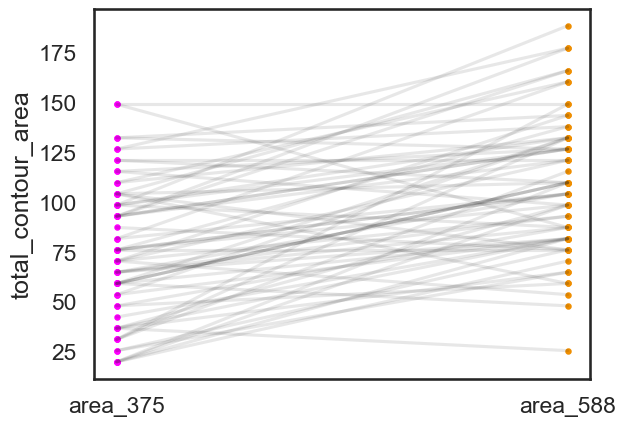

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [ ]:
ruv_colour = [pygor.plotting.custom.fish_palette[-1], pygor.plotting.custom.fish_palette[0]]

<AxesSubplot: >

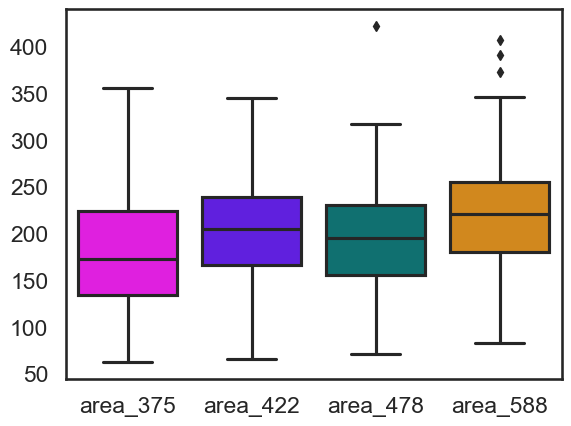

In [ ]:
sns.boxplot(data = chroma_df.filter(like = "area").query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1"), palette = reversed(pygor.plotting.fish_palette))

(0.0, 700.0)

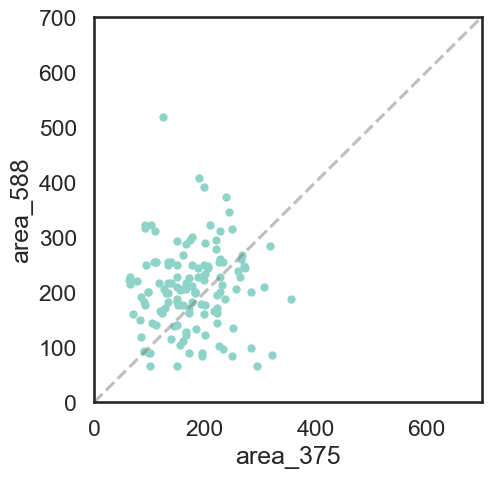

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 700)
plt.ylim(0, 700)


## Clustering on chromatic properties

In [6]:
import pygor.strf.clustering
import natsort
import warnings
import pygor.strf.clustering
# try:
#     chroma_df
# except NameError:
#     chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df = pygor.strf.analyse.chromatic_stats(exp)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  comple

In [7]:
chroma_df

date                                               path  \
0    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
1    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
2    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
3    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
4    2023-11-14  C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   
..          ...                                                ...   
480  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
481  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
482  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
483  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   
484  2023-08-02  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...   

                               filename  \
0     2023-11-14_0_0_SWN_200_Colours.h5   
1     2023-11-14_0_0_SWN_200_Colours.h5   
2     2023-11-14_0_0_SWN_200_Colours.h5   
3     2023-11-14_0_0_SWN_200_Colours.h5   
4     2023-11-14_0_0_SWN_200_Colours.h5   
..                                  ...   
480  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
481  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
482  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
483  2023-8-2_'0_1_ColourSWN_200_1H'.h5   
484  2023-8-2_'0_1_ColourSWN_200_1H'.h5   

                                             curr_path strf_keys  \
0    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_0   
1    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_1   
2    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_2   
3    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_3   
4    C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...   STRF0_4   
..                                                 ...       ...   
480  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_20   
481  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_21   
482  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_22   
483  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_23   
484  C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...  STRF0_24   

                                               cell_id  size  ipl_depths  \
0     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_0   200        95.0   
1     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_1   200        81.0   
2     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_2   200        81.0   
3     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_3   200        75.0   
4     2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_4   200        43.0   
..                                                 ...   ...         ...   
480  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        83.0   
481  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        61.0   
482  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        84.0   
483  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        34.0   
484  2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...   200        87.0   

     opp_bool  ampl_375  ...  \
0        True -0.311245  ...   
1        True  2.385180  ...   
2        True -0.423248  ...   
3        True  3.902692  ...   
4       False  4.320810  ...   
..        ...       ...  ...   
480      True  0.250045  ...   
481      True -0.284578  ...   
482     False  0.296887  ...   
483     False -0.398743  ...   
484     False  0.427444  ...   

                                           spatial_478  \
0    [[None, None, None, None, None, None, None, No...   
1    [[None, None, None, None, None, None, None, No...   
2    [[None, None, None, None, None, None, None, No...   
3    [[None, None, None, None, None, None, None, No...   
4    [[None, None, None, None, None, None, None, No...   
..                                                 ...   
480  [[-0.383058026698815, -0.31721687179159297, 0....   
481  [[0.7869588246379273, 0.345906152385463, 0.910...   
482  [[None, Non

In [8]:
chroma_df.columns

Index(['date', 'path', 'filename', 'curr_path', 'strf_keys', 'cell_id', 'size',
       'ipl_depths', 'opp_bool', 'ampl_375', 'ampl_422', 'ampl_478',
       'ampl_588', 'area_375', 'area_422', 'area_478', 'area_588', 'cat_pol',
       'centdom_375', 'centdom_422', 'centdom_478', 'centdom_588',
       'centneg_375', 'centneg_422', 'centneg_478', 'centneg_588',
       'centpos_375', 'centpos_422', 'centpos_478', 'centpos_588', 'comp_375',
       'comp_422', 'comp_478', 'comp_588', 'peakneg_375', 'peakneg_422',
       'peakneg_478', 'peakneg_588', 'peakpos_375', 'peakpos_422',
       'peakpos_478', 'peakpos_588', 'pol_375', 'pol_422', 'pol_478',
       'pol_588', 'roi', 'spatial_375', 'spatial_422', 'spatial_478',
       'spatial_588', 'spatial_X', 'spatial_Y', 'strf_obj', 'temporal_375',
       'temporal_422', 'temporal_478', 'temporal_588', 'temporal_len'],
      dtype='object')

In [10]:
sns.set_theme(style="white")
sns.set_context("talk")

Automatic number determined as AIC = -1676.1133754771167 landing on covariance_type = full with  7 n_components
Automatic number determined as AIC = -4006.011571908177 landing on covariance_type = full with  6 n_components
Automatic number determined as AIC = -2076.577411341369 landing on covariance_type = full with  6 n_components
Automatic number determined as AIC = -1465.4402320999511 landing on covariance_type = full with  7 n_components


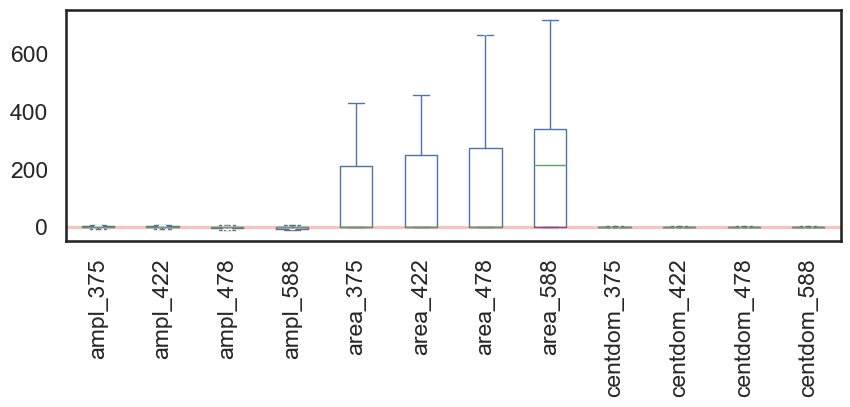

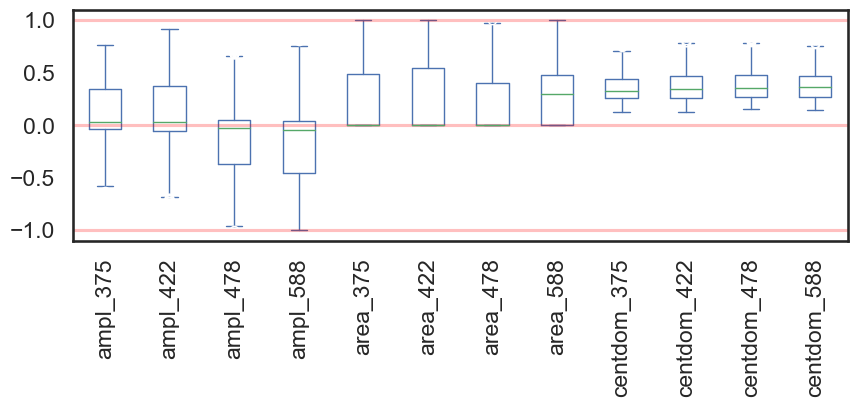

In [138]:
merged_pca_df, scaled_stats_df, org_stats_df, pca_results = pygor.strf.clustering.run_clustering(chroma_df)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\plot.py:24: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(cmap, len(np.unique(labels)) + 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\plot.py:24: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(cmap, len(np.unique(labels)) + 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\plot.py:24: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(cmap, len(np.unique(labels)) + 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\p

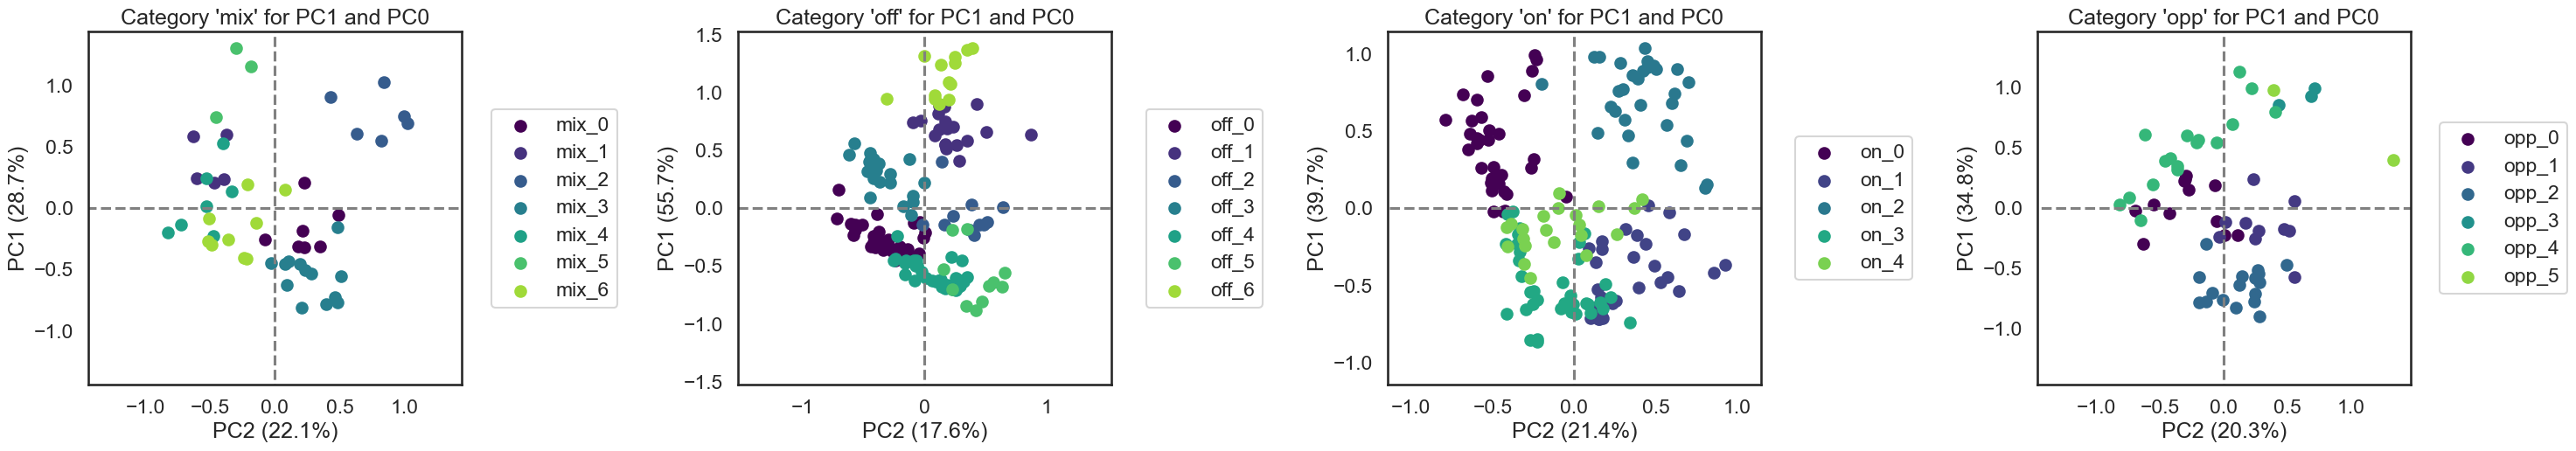

In [16]:
pygor.strf.clustering.plot.pc_summary(merged_pca_df, pca_results)

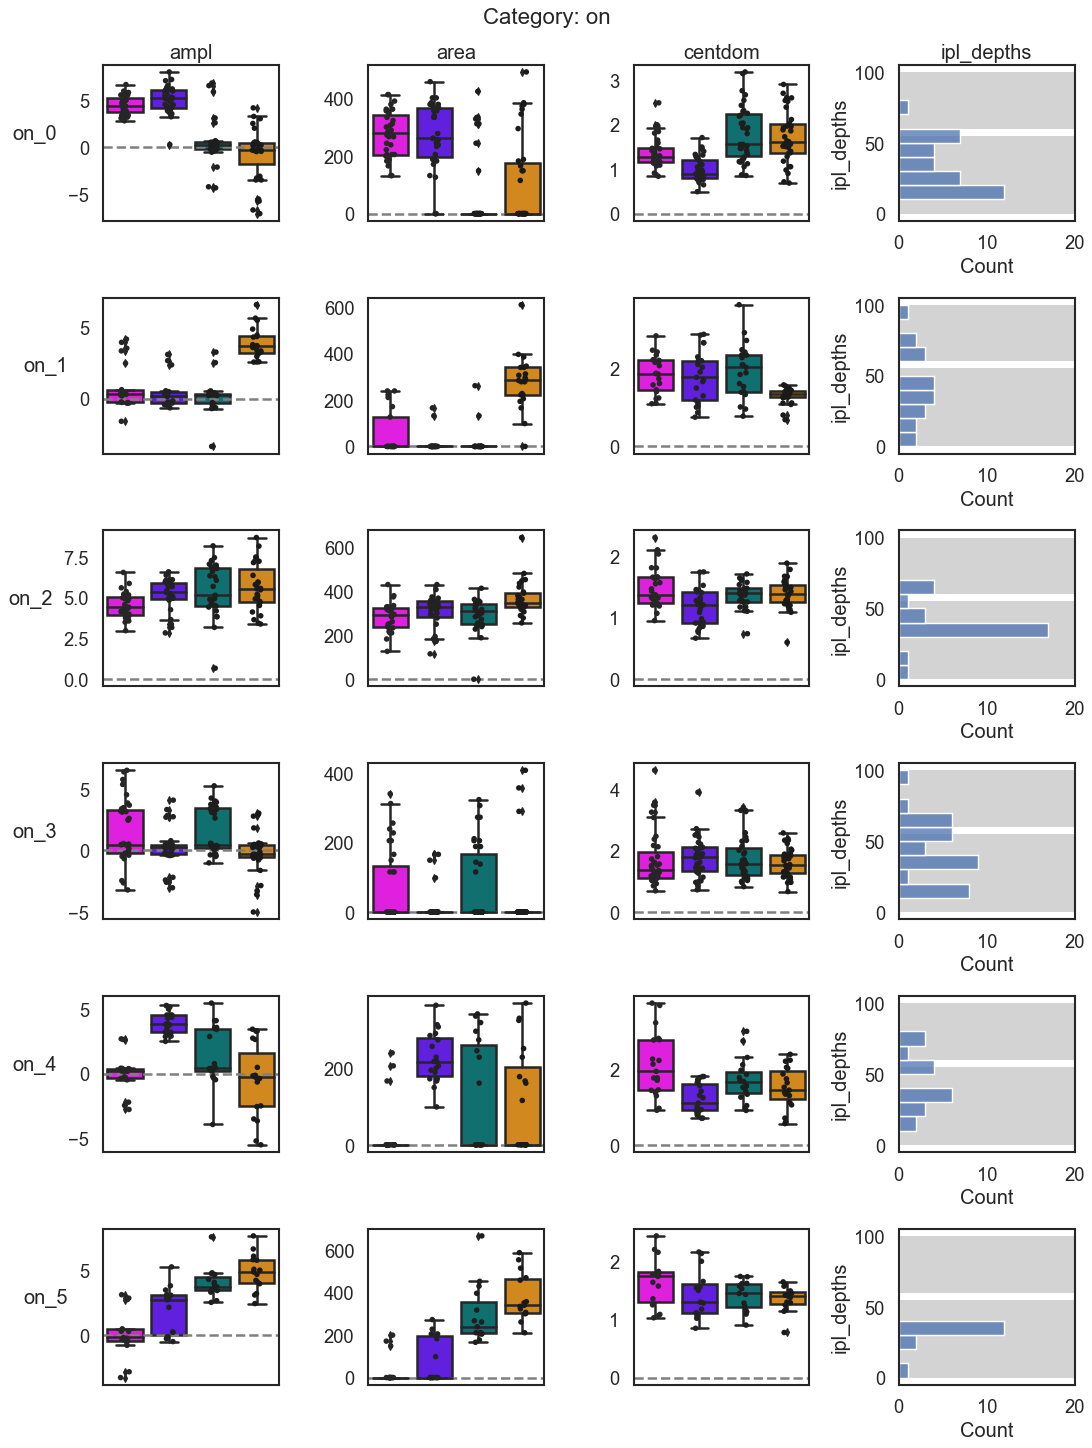

In [139]:
pygor.strf.clustering.plot.stats_summary(org_stats_df, cat = "on")

In [140]:
import pygor.plotting

In [18]:
clust_id = "opp_4"

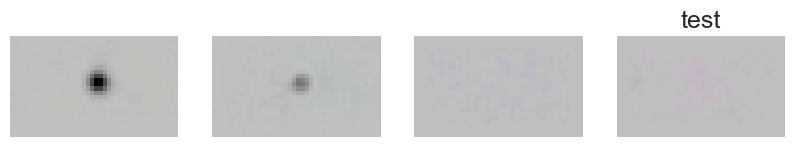

In [68]:
srf_avgs = pygor.strf.clustering.reconstruct_cluster_spatial(org_stats_df, clust_id)
minmax_abs = np.max(np.abs(srf_avgs))
fig, axs = plt.subplots(1, 4, figsize = (10, 4))
for n, ax in enumerate(axs):
    ax.pcolormesh(srf_avgs[n], vmin = -minmax_abs, vmax = minmax_abs, cmap = pygor.plotting.maps_concat[n])
    ax.set_aspect("equal")
    ax.axis('off')

In [141]:
strf_avgs = pygor.strf.clustering.reconstruct_cluster_strf(org_stats_df, clust_id)
anim = pygor.plotting.play_movie_4d(strf_avgs, show_cbar=False, cmap_list = pygor.plotting.maps_concat)
anim

### Generate average projections of all clusters and store them

In [ ]:
clust_ids = natsort.natsorted(pd.unique(org_stats_df["cluster_id"]))[1:] # first comes out as nan for some reason

### Generate average projections of all clusters and store them

In [ ]:
clust_ids = natsort.natsorted(pd.unique(org_stats_df["cluster_id"]))[1:] # first comes out as nan for some reason

In [116]:
save_dict = pathlib.Path(r"C:\Users\Simen\OneDrive\Universitet\PhD\Figures")


In [131]:
def spatial_colors(d3_srf_arr):
    minmax_abs = np.max(np.abs(srf_avgs))
    fig, axs = plt.subplots(1, 4, figsize = (10, 4))
    for n, ax in enumerate(axs):
        ax.pcolormesh(srf_avgs[n], vmin = -minmax_abs, vmax = minmax_abs, cmap = pygor.plotting.maps_concat[n])
        ax.set_aspect("equal")
        ax.axis('off')
    plt.close()
    return fig

In [136]:
exp.recording[0].play_multichrom_strf(0)

In [132]:
save_dict = pathlib.Path(r"C:\Users\Simen\OneDrive\Universitet\PhD\Figures")
for i in clust_ids:
    # Generate the data
    srf_avgs = pygor.strf.clustering.reconstruct_cluster_spatial(org_stats_df, i)
    strf_avgs= pygor.strf.clustering.reconstruct_cluster_strf(org_stats_df, i)
    # Generate the first figure 
    fig = make_spatial_fig(srf_avgs)
    # Generate the animation
    anim = pygor.plotting.play_movie_4d(strf_avgs, show_cbar=False, cmap_list = pygor.plotting.maps_concat)
    # Save both 
    fig.savefig(save_dict.joinpath("RFs", f"rf_{i}.png"))
    anim.save(save_dict.joinpath("STRFs", f"strf_{i}.gif"), fps = 12)
    print("Stored plots for", i)

Stored plots for mix_0
Stored plots for mix_1
Stored plots for mix_2
Stored plots for mix_3
Stored plots for mix_4
Stored plots for mix_5
Stored plots for mix_6
Stored plots for off_0
Stored plots for off_1
Stored plots for off_2
Stored plots for off_3
Stored plots for off_4
Stored plots for off_5
Stored plots for off_6
Stored plots for on_0
Stored plots for on_1
Stored plots for on_2
Stored plots for on_3
Stored plots for on_4
Stored plots for opp_0
Stored plots for opp_1
Stored plots for opp_2
Stored plots for opp_3
Stored plots for opp_4
Stored plots for opp_5


In [142]:
### Make a monster plot